# QF 627 Extras - Financial Analytics
## Problem Set `5` | `RE`view `REVISTED`

> Hi Team! 👋

> To support your learning progress, I’ve been closely observing your submissions and your participation in the problem-solving leadership sessions. Based on these observations, I find it would be beneficial for you to revisit some of the econometric methods for causal inference. As such, I’ve made a few revisions to the originally planned set of questions.

> Problem Set 5 now consists of three questions, and this time, you are required to first identify a valid econometric method appropriate for each problem before conducting your analysis. Of the three questions, two—specifically the first and third—will ask you to clearly specify your modeling strategy by determining which econometric method of causal inference is most suitable for solving the given analytics problem.

> As we’ve discussed in class, the central goal of our course is to develop your ability to solve real-world problems using analytics. To support your reasoning in selecting appropriate modeling strategies, I’ve provided a function we’ve reviewed multiple times in class. Please use this function to help determine the most suitable econometric method for each question.

> Once you’ve identified your approach, proceed to answer each question by applying the method to assess the causal effects of interest, drawing on the knowledge you’ve acquired throughout the course.

> Enjoy 🤗

### <font color = green> Activation of necessary libraries for setting your print options

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

### <mark>Import the below function provided by Prof. Roh into your working environment to enable algorithmic decision aids based on causal inference methods.</mark>

In [2]:
def would_you_recommend_causal_inference_method():
    print("Welcome to the Causal Inference Recommender architected by Prof. Roh :)")
    print("Please answer to the following questions with either 'yes' or 'no'.\n")

    # Question 1. RCT Feasibility (from observation to intervention)
    can_randomized =\
    (
        input("Question 1: Can we RANDOMIZE the treatment assignment? (yes / no): ")
        .strip()
        .lower()
    )
    
    if can_randomized == "yes":
        print("\nRecommended Method: **RCTs (Randomized Controlled Trials)**")
        return

    # Question 2. Threshold for RDD
    has_threshold =\
    (input("Question 2: Is there a threshold that assigns treatment (e.g., cut-off) (yes / no): ?")
     .strip()
     .lower()
    )
    
    if has_threshold == "yes":
        print("\nRecommended Method: **RDD (Regression Discontinuity Design)")
        return

    # Question 3. Check for Panel (vs. Cross-sectional) or Time-Series Data
    has_panel_data =\
    (input("Question 3: Do we have panel (longitudinal) or repeated Cross-Sectional Data over Time? (yes / no): ")
     .strip()
     .lower()
    )
    
    if has_panel_data == "yes":
        # contingency

        # Question 4. Do we have single or multiple treated units
        single_treated =\
        (
         input("Question 4: Do you have ONLY ONE treated unit (e.g., one city, one district)? (yes / no): ")
            .strip()
            .lower()
        )
        
        if single_treated == "yes":
            
            parallel_trends =\
            (
                input("Question 5: Are we confident the 'parallel trends' assumption would hold if you used a DiD? (yes / no): ")
                .strip()
                .lower()
            )

            if parallel_trends == "yes":
                print("\nParallel trends might hold, but you still only have ONE TREATED UNIT...")
                print("\nRecommended Method: **Difference-in-Differences is fine.**"
                     )
            else:
                print("\nSince parallel trends are questionable and there's only ONE TREATED UNIT...")
                print("\nRecommended Method: **Synthetic Control**")
            return

        else: 
            parallel_trends = input("Question 5: Can we assume paraell trends with multiple treated units? (yes / no ): ").strip().lower()
            if parallel_trends == "yes":
                print("\nRecommended Method: **Difference-in-Differences (DiD) ** ")
                return
            else: 
                print("\nParallel trends are questionable for multiple treated units.")
                print("\nTeam, you should consider more advanced methods as follows:")
                print("\n - Matching along with DiD (to align pre-trends on a matched sample.")
                print("\n - Synthetic Control for subsets if feasible")
                print("\n - More advanced methods ... call Prof. Roh :)")
                return

    else: 
        print("\n Recommended Method: **Matching** (Propensity Scoring and Inverse Probability Weights (**IPW**).")
        return

## <font color = red> Below, you will find `three larger sets` of questions. 
    
## <font color = organge> Please ensure that you demonstrate the workflow of your problem-solving process for these analytics questions. 
    
## <font color = organge> Specifically, follow these steps: import → wrangle → EDA → further wrangle (if necessary) → visualize and/or model → refine the model and/or visualization → report.

## ❓ <a id = "top"> List of Analytic Questions </a> ❓

## [Q1. The Effect of Workplace Injury Compensation on Moral Hazard](#p1)

> ### <font color = red> Identify the econometric method of causal inference that would be valid for addressing the given problem. </font>

## [Q2. Effects of the Bank’s Managerial Training Program](#p2)

> ### <font color = red> Use PSM and IPW </font>

## [Q3. Attendance and Performance in School](#p3)

> ### <font color = red> Identify the econometric method of causal inference that would be valid for addressing the given problem. </font>

## <a id = "p1"></a><font color = blue> 👉 Big Questions 1</font>  [back to table of contents](#top)
    
### <font color = green> BUSINESS CONTEXT & ANALYTIC QUESTION
    
> An organization increased its cap on weekly earnings covered by worker's compensation. 

    As a respected data scientist in the field, you have been hired as a consultant by the company. They want to know if this new strategy has led workers to spend more time unemployed.
    
> If benefits are not generous enough, workers may sue companies for on-the-job injuries. However, overly generous benefits could create moral hazard issues, encouraging workers to be more reckless on the job or falsely claim that off-the-job injuries occurred at work.

    The primary outcome variable you are concerned with is log_duration, which represents the logged duration (in weeks) of worker's compensation benefits. You log it because the variable is fairly skewed—most people are unemployed for a few weeks, with some remaining unemployed for an extended period. 
    
> The strategy was designed so that the cap increase would not affect low-earning workers but would impact high-earning workers. Therefore, you use low-earning workers as your control group and high-earning workers as your treatment group.
    
    Based on your analysis using econometric methods of your choice, what is your assessment? Did the policy cause an increase in the duration of unemployment following a workplace injury? If so, by how much?

### <font color = green> LIST of VARIABLES
<br>
    
* `duration`: Duration of unemployment benefits, measured in weeks
<br>

* `log_duration`: Logged version of duration
<br>
        
* `after_change`: Categorical variable marking if the observation happened before (0) or after (1) the policy change in 1980. This serves as our time (or before/after variable)
<br>

* `high_earning`: Categorical variable marking if the observation is a low (0) or high (1) earner. This is our group (or treatment/control) variable    
<br>    
    
* `male`: Categorical variable for gender (1 = male)
<br>    
    
* `married`: Categorical variable for marital status (1 = married)
<br>
    
* `age`: Age of the individual
<br>
    
* `hospitalized`: Indicator variable for hospitalization (1 = hospitalized)
<br>
    
* `industry`: Categorical variable for types of industry (1 = manufacturing, 2 = construction, 3 = other)
<br>
    
* `injury_type`: Categorical variable for different types of injuries (1-8)
<br>    
    
* `log_pre_wage`: Logged version of wage prior to filing a claim

### <mark> Dataset </mark> https://talktoroh.com/s/injury_comp.csv

### <font color = red> Using the function below, please begin by identifying the appropriate econometric method for causal inference for each question.

```python
would_you_recommend_causal_inference_method()
```

### <font color = red> IMPORT

In [3]:
data1 =\
(
    pd
    .read_csv("https://talktoroh.com/s/injury_comp.csv")
)

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5626 entries, 0 to 5625
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   high_earning  5626 non-null   int64  
 1   duration      5626 non-null   float64
 2   log_duration  5626 non-null   float64
 3   after_change  5626 non-null   int64  
 4   male          5615 non-null   float64
 5   married       5366 non-null   float64
 6   age           5622 non-null   float64
 7   hospitalized  5626 non-null   int64  
 8   industry      5610 non-null   float64
 9   injury_type   5626 non-null   int64  
 10  log_pre_wage  5626 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 483.6 KB


In [5]:
(
    data1
    .isnull()
    .sum()
)

high_earning      0
duration          0
log_duration      0
after_change      0
male             11
married         260
age               4
hospitalized      0
industry         16
injury_type       0
log_pre_wage      0
dtype: int64

In [6]:
(
    data1
    .describe()
    .T
)

,count,mean,std,min,25%,50%,75%,max
high_earning,5626.0,0.425524,0.494466,0.000000,0.000000,0.000000,1.000000,1.000000
duration,5626.0,8.920947,21.756708,0.250000,2.000000,4.000000,8.000000,182.000000
log_duration,5626.0,1.277745,1.282151,-1.386294,0.693147,1.386294,2.079442,5.204007
after_change,5626.0,0.477782,0.499551,0.000000,0.000000,0.000000,1.000000,1.000000
male,5615.0,0.770258,0.420704,0.000000,1.000000,1.000000,1.000000,1.000000
married,5366.0,0.699404,0.458560,0.000000,0.000000,1.000000,1.000000,1.000000
age,5622.0,34.227499,12.542559,14.000000,24.000000,31.000000,43.000000,98.000000
hospitalized,5626.0,0.263953,0.440813,0.000000,0.000000,0.000000,1.000000,1.000000
industry,5610.0,2.360250,0.856939,1.000000,1.000000,3.000000,3.000000,3.000000
injury_type,5626.0,4.441344,1.516437,1.000000,3.000000,5.000000,6.000000,8.000000


### <font color = red> WRANGLE </font>

In [7]:
data1_CLEANED =\
(
    data1
    .dropna() # do NOT just remove missing values, instead please impute
) # returns list-wise deletion

In [8]:
data1_CLEANED.describe().T

,count,mean,std,min,25%,50%,75%,max
high_earning,5347.0,0.417243,0.493150,0.000000,0.000000,0.000000,1.000000,1.000000
duration,5347.0,8.659950,20.702302,0.250000,2.000000,4.000000,8.000000,182.000000
log_duration,5347.0,1.274337,1.275158,-1.386294,0.693147,1.386294,2.079442,5.204007
after_change,5347.0,0.480082,0.499650,0.000000,0.000000,0.000000,1.000000,1.000000
male,5347.0,0.769403,0.421254,0.000000,1.000000,1.000000,1.000000,1.000000
married,5347.0,0.698897,0.458780,0.000000,0.000000,1.000000,1.000000,1.000000
age,5347.0,34.164204,12.555212,14.000000,24.000000,31.000000,43.000000,98.000000
hospitalized,5347.0,0.264447,0.441080,0.000000,0.000000,0.000000,1.000000,1.000000
industry,5347.0,2.345427,0.861423,1.000000,1.000000,3.000000,3.000000,3.000000
injury_type,5347.0,4.437255,1.518911,1.000000,3.000000,5.000000,6.000000,8.000000


In [9]:
data1_CLEANED =\
(
    data1
    [data1["age"] <= 68]
)

In [10]:
data1_CLEANED.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5591 entries, 0 to 5625
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   high_earning  5591 non-null   int64  
 1   duration      5591 non-null   float64
 2   log_duration  5591 non-null   float64
 3   after_change  5591 non-null   int64  
 4   male          5580 non-null   float64
 5   married       5334 non-null   float64
 6   age           5591 non-null   float64
 7   hospitalized  5591 non-null   int64  
 8   industry      5575 non-null   float64
 9   injury_type   5591 non-null   int64  
 10  log_pre_wage  5591 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 524.2 KB


In [11]:
# make sure to assign the proper (and valid) data type for each variable

data1_CLEANED["male"] = data1_CLEANED["male"].astype(bool)

data1_CLEANED["married"] = data1_CLEANED["married"].astype(bool)

data1_CLEANED["hospitalized"] = data1_CLEANED["hospitalized"].astype(bool)

data1_CLEANED["industry"] = data1_CLEANED["industry"].astype("category")

data1_CLEANED["injury_type"] = data1_CLEANED["injury_type"].astype("category")

/var/folders/k1/7yl62fwx2879_758cjywcjrw0000gn/T/ipykernel_60508/3396789332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_CLEANED["male"] = data1_CLEANED["male"].astype(bool)
/var/folders/k1/7yl62fwx2879_758cjywcjrw0000gn/T/ipykernel_60508/3396789332.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_CLEANED["married"] = data1_CLEANED["married"].astype(bool)
/var/folders/k1/7yl62fwx2879_758cjywcjrw0000gn/T/ipykernel_60508/3396789332.py:7: SettingWithCopyWarning: 
A value is trying to be s

In [12]:
data1_CLEANED.dtypes

high_earning       int64
duration         float64
log_duration     float64
after_change       int64
male                bool
married             bool
age              float64
hospitalized        bool
industry        category
injury_type     category
log_pre_wage     float64
dtype: object

### <font color = red> Modeling or Visualization </font> 

In [13]:
import statsmodels.formula.api as smf

In [14]:
data1_CLEANED.columns

Index(['high_earning', 'duration', 'log_duration', 'after_change', 'male',
       'married', 'age', 'hospitalized', 'industry', 'injury_type',
       'log_pre_wage'],
      dtype='object')

In [15]:
formal_model_DiD =\
(
    smf
    .ols(formula = "log_duration ~ high_earning * after_change",
         data = data1)
    .fit()
)

formal_model_DiD.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.1256,0.031,36.621,0.000,1.065,1.186
high_earning,0.2565,0.047,5.406,0.000,0.163,0.349
after_change,0.0077,0.045,0.171,0.864,-0.080,0.095
high_earning:after_change,0.1906,0.069,2.782,0.005,0.056,0.325


In [16]:
(
    formal_model_DiD
    .conf_int()
    .loc["high_earning:after_change"]
)

0    0.056297
1    0.324905
Name: high_earning:after_change, dtype: float64

In [17]:
np.exp(
    formal_model_DiD
    .params
    ["high_earning:after_change"]
) # note that this this logarithmic
  # note that the unit is "week" --> 1.2 week --> 6 days

np.float64(1.2099768178926462)

In [18]:
data1_CLEANED.columns

Index(['high_earning', 'duration', 'log_duration', 'after_change', 'male',
       'married', 'age', 'hospitalized', 'industry', 'injury_type',
       'log_pre_wage'],
      dtype='object')

## <mark>Sensitivity Analysis</mark>

In [19]:
model_simple =\
(
    smf
    .ols(formula = "log_duration ~ high_earning * after_change",
         data = data1_CLEANED)
    .fit()
)

In [20]:
model_with_covariates =\
(
    smf
    .ols(formula = "log_duration ~ high_earning * after_change + " # main terms of interest for the interaction term
                   "male + married + age + hospitalized + industry + injury_type + log_pre_wage", # covariates
         data = data1_CLEANED)
    .fit()
)

In [21]:
model_with_boundary =\
(
    smf
    .ols(formula = "log_duration ~ high_earning * after_change * married", # three-way interactions
         data = data1_CLEANED)
    .fit()
)

In [22]:
model_with_boudnary_covariates =\
(
    smf
    .ols(formula = "log_duration ~ high_earning * after_change * married + " # main terms of interest for the interaction term
                   "male + age + hospitalized + industry + injury_type + log_pre_wage", # covariates
         data = data1_CLEANED)
    .fit()
)

## <mark> How to Report Your Sensitivity Analysis </mark>

In [23]:
from stargazer.stargazer import Stargazer

In [24]:
%who

Stargazer	 data1	 data1_CLEANED	 formal_model_DiD	 model_simple	 model_with_boudnary_covariates	 model_with_boundary	 model_with_covariates	 mpl	 
np	 pd	 plt	 smf	 would_you_recommend_causal_inference_method	 


In [25]:
many_models =\
(
    Stargazer(
              [model_simple,
               model_with_covariates,
               model_with_boundary,
               model_with_boudnary_covariates
              ]
              )
)

In [26]:
many_models.title("Formal Modeling of Difference-in-Differences with Sensitivity Analysis")

many_models.custom_columns(
                    ["Baseline Model",
                     "with Controls",
                     "with Moderator",
                     "with Moderator & Controls"],
                     [1, 1, 1, 1]
                   )

many_models.show_model_numbers(True)

many_models.significant_digits(3)

In [27]:
html_report =\
(
    many_models
    .render_html()
)

In [28]:
from IPython.display import HTML, display

In [29]:
display(HTML(html_report)
       )

In [30]:
html_report

'Formal Modeling of Difference-in-Differences with Sensitivity Analysis<br><table style="text-align:center"><tr><td colspan="5" style="border-bottom: 1px solid black"></td></tr>\n<tr><td style="text-align:left"></td><td colspan="4"><em>Dependent variable: log_duration</em></td></tr><tr><td style="text-align:left"></td><tr><td></td><td colspan="1">Baseline Model</td><td colspan="1">with Controls</td><td colspan="1">with Moderator</td><td colspan="1">with Moderator & Controls</td></tr><tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td><td>(4)</td></tr>\n<tr><td colspan="5" style="border-bottom: 1px solid black"></td></tr>\n\n<tr><td style="text-align:left">Intercept</td><td>1.126<sup>***</sup></td><td>-1.477<sup>***</sup></td><td>1.019<sup>***</sup></td><td>-1.497<sup>***</sup></td></tr>\n<tr><td style="text-align:left"></td><td>(0.031)</td><td>(0.418)</td><td>(0.048)</td><td>(0.419)</td></tr>\n<tr><td style="text-align:left">after_change</td><td>0.010<sup></sup></t

### <font color = red> Visualization or Modeling </font> 

> `Answer`: `Please provide your assessment of the causal effects here.`

## <a id = "p2"></a><font color = blue> 👉 Big Questions 2</font>  [back to table of contents](#top)

### <font color = green> BUSINESS CONTEXT

> A big multinational bank decided to invest in training for its new managers. To measure the effectiveness of the training, the company attempted to randomly select managers for the program. The plan was to compare the engagement scores of employees whose managers were enrolled in the program with those whose managers were not. With proper randomization, this simple comparison would provide the average treatment effect of the training.

> Unfortunately, things did not go as planned. Some managers didn’t want to attend the training, so they simply didn’t show up. Others managed to receive the training without being assigned to it. As a result, what was intended to be a randomized study ended up resembling an observational one.

    Your goal is to estimate the causal effects: the treatment variable is intervention, and your outcome of interest is engagement_score, which is the average standardized engagement score for that manager’s employees. Beyond the treatment and the outcome, the covariates in this data are as follows:

#### Variables Collected

- `department_id`: A unique identifier for the department <mark>CAT</mark>
- `tenure`: The number of years the manager has been with the company (as an employee, not necessarily as a manager)
- `n_of_reports`: The number of reports the manager has
- `gender`: Categorical variable for manager identified gender
- `role`: Job category inside the company <mark>CAT</mark>
- `department_size`: The number of employees in that same department
- `department_score`: The average engagement score in that same department
- `last_engagement_score`: The average engagement score for that manager in the previous iteration of the engagement survey


### <mark> Dataset </mark> https://talktoroh.com/s/bank_manager_training.csv

### <font color = green> Please solve the causal analytic question for the bank using two methods of matching in econometrics: namely, `propensity score matching` and `matching with inverse probability weights`. </font>

### <font color = red> Provide your workflow of analysis that will lead to answers for the questions given below. It is advisable to write your answers within separate code cells with annotations (either using comments in the code cell or using markdown cells). </font>

- Import
- Wrangle (Preparing Vectors of Interest)
- Visualize/Model
- Model/Visualize
- Report

In [31]:
# import numpy as np
# import pandas 

In [32]:
data2 =\
(
    pd
    .read_csv("https://talktoroh.com/s/bank_manager_training.csv")
)

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10391 entries, 0 to 10390
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   departament_id         10391 non-null  int64  
 1   intervention           10391 non-null  int64  
 2   engagement_score       10391 non-null  float64
 3   tenure                 10391 non-null  int64  
 4   n_of_reports           10391 non-null  int64  
 5   gender                 10391 non-null  int64  
 6   role                   10391 non-null  int64  
 7   last_engagement_score  10391 non-null  float64
 8   department_score       10391 non-null  float64
 9   department_size        10391 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 811.9 KB


In [33]:
data2.corr()[["engagement_score", "intervention"]]

,engagement_score,intervention
departament_id,-0.078337,0.002266
intervention,0.216614,1.000000
engagement_score,1.000000,0.216614
tenure,0.438577,0.199276
n_of_reports,-0.008746,0.000497
gender,-0.159343,-0.031315
role,0.051367,-0.026555
last_engagement_score,0.011241,0.104083
department_score,0.013696,-0.065904
department_size,0.006148,0.063432


In [34]:
data2["role"].unique()

array([4, 3, 1, 0, 2])

In [35]:
data2["departament_id"].unique()

array([76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60,
       59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43,
       42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26,
       25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,
        8,  7,  6,  5,  4,  3,  2,  1])

### Correlation between numerical and categorical variables

In [36]:
sample_df =\
(
    pd
    .DataFrame(
        {"region": ["North", "South", "East", "West", "North", "East", "West"],
         "income": [50, 60, 55, 65, 52, 58, 63]
        }
    )
)

sample_df

,region,income
0,North,50
1,South,60
2,East,55
3,West,65
4,North,52
5,East,58
6,West,63


### What optimizers do

In [37]:
def calculate_corr_ratio_ETA(cat, num):
    cat = np.array(cat)
    num = np.array(num)
    overall_mean = num.mean()
    cat_levels = np.unique(cat)

    # Decomposition of variance
    ss_between_cat =\
    (
        sum(
            len(num[cat == l])
            *
            (num[cat == l].mean() - overall_mean)**2
            for l in cat_levels
        )
    )

    ss_total =\
    (
        ((num - overall_mean)**2
        ).sum()
    )

    return np.sqrt(ss_between_cat / ss_total) # 

In [38]:
eta = calculate_corr_ratio_ETA(sample_df["region"], sample_df["income"]
                              ) # 

In [39]:
eta # min. 0 - max. 1

np.float64(0.9768473622991307)

In [40]:
data2.columns

Index(['departament_id', 'intervention', 'engagement_score', 'tenure',
       'n_of_reports', 'gender', 'role', 'last_engagement_score',
       'department_score', 'department_size'],
      dtype='object')

In [41]:
calculate_corr_ratio_ETA(data2["role"], data2["intervention"])**2

np.float64(0.010984711854293724)

In [42]:
calculate_corr_ratio_ETA(data2["role"], data2["engagement_score"])**2

np.float64(0.023439874607989165)

#### <mark>eta of 0.65 denotes 42% of total variance</mark>

#### <mark>eta of 0.15 denotes 2% of total variance</mark>

### VBA-level: What those who are in-between Deverlopers and Users Do

In [43]:
from sklearn.feature_selection import mutual_info_regression

In [44]:
sample_df.columns

Index(['region', 'income'], dtype='object')

In [45]:
sample_df["region"] =\
(
    sample_df["region"]
    .astype("category")
    .cat
    .codes
)

sample_df["region"]

0    1
1    2
2    0
3    3
4    1
5    0
6    3
Name: region, dtype: int8

In [46]:
mutual_information =\
(
    mutual_info_regression(
        sample_df[["region"]], # CAT
        sample_df["income"], # NUM
        discrete_features = True,
        random_state = 6050
    )
)

mutual_information # feature importance

array([0.95])

### Propensity Scoring

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
data2.columns

Index(['departament_id', 'intervention', 'engagement_score', 'tenure',
       'n_of_reports', 'gender', 'role', 'last_engagement_score',
       'department_score', 'department_size'],
      dtype='object')

In [50]:
potential_confounders = ["gender", "tenure", "last_engagement_score"]

In [51]:
data2_Z = data2.copy()

In [52]:
# for var in potential_confounders:
#     data2_Z[var] =\
#     (
#         scaler
#         .fit_transform(data2_Z[var]
#                       )
#         .values
#     )

In [53]:
confounders_Z =\
(
    scaler
    .fit_transform(data2
                   [potential_confounders]
                  )
)

In [54]:
confounders_Z 

array([[ 1.02 ,  0.653,  0.405],
       [ 1.02 , -1.132,  0.009],
       [ 1.02 ,  0.653,  0.589],
       ...,
       [-0.98 , -2.916, -1.125],
       [-0.98 , -0.239, -0.97 ],
       [ 1.02 , -0.239, -1.194]])

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logit_model = LogisticRegression()

In [57]:
(
    logit_model
    .fit(confounders_Z, data2["intervention"]
        )
)# this takes in place, TEAM.

LogisticRegression()

In [58]:
data2["PS"] =\
(
    logit_model
    .predict_proba(confounders_Z)[ : , 1]
) # 2d-array

In [59]:
data2[["intervention", "engagement_score", "PS"]]

,intervention,engagement_score,PS
0,1,0.277359,0.613360
1,1,-0.449646,0.413409
2,1,0.769703,0.621953
3,1,-0.121763,0.593192
4,1,1.526147,0.635373
...,...,...,...
10386,0,0.808867,0.608289
10387,0,-0.156063,0.648256
10388,0,0.370820,0.229682
10389,0,-0.396297,0.479998


In [60]:
treated =\
(
    data2
    [data2["intervention"] == 1
    ]
)

controlled =\
(
    data2
    [data2["intervention"] == 0
    ]
)

In [61]:
from sklearn.neighbors import NearestNeighbors

In [62]:
neighbors =\
(
    NearestNeighbors(n_neighbors = 1)
    .fit(controlled[["PS"]]
        )
)

In [63]:
neighbors

NearestNeighbors(n_neighbors=1)

In [64]:
distances, indices =\
(
    neighbors
    .kneighbors(treated[["PS"]]
               )
)

In [65]:
matched_control =\
(
    controlled
    .iloc[indices.flatten()
          ]
    # do NOT use explicit location accessor
    # .loc[]
)

In [66]:
matched_data =\
(
    pd
    .concat([treated,
             matched_control]
           )
)

In [67]:
matched_data

,departament_id,intervention,engagement_score,tenure,n_of_reports,gender,role,last_engagement_score,department_score,department_size,PS
0,76,1,0.277359,6,4,2,4,0.614261,0.224077,843,0.613360
1,76,1,-0.449646,4,8,2,4,0.069636,0.224077,843,0.413409
2,76,1,0.769703,6,4,2,4,0.866918,0.224077,843,0.621953
3,76,1,-0.121763,6,4,2,4,0.029071,0.224077,843,0.593192
4,76,1,1.526147,6,4,1,4,0.589857,0.224077,843,0.635373
...,...,...,...,...,...,...,...,...,...,...,...
4960,63,0,-0.490101,4,8,1,4,0.334848,0.196662,389,0.446630
4368,68,0,-0.308586,4,2,2,4,-1.997011,1.510415,426,0.343546
6352,48,0,1.562552,6,8,1,3,0.926888,0.613756,392,0.646543
3970,73,0,-2.003651,6,4,2,1,-0.323462,-0.169849,1192,0.580885


In [68]:
matched_data =\
(
    matched_data
    .reset_index(drop = True)
)

matched_data.head(2)

,departament_id,intervention,engagement_score,tenure,n_of_reports,gender,role,last_engagement_score,department_score,department_size,PS
0,76,1,0.277359,6,4,2,4,0.614261,0.224077,843,0.613360
1,76,1,-0.449646,4,8,2,4,0.069636,0.224077,843,0.413409


In [69]:
# import statsmodels.formula.api as smf
import statsmodels.api as sm

In [70]:
x_var_matched =\
(
    sm
    .add_constant(matched_data["intervention"]
                 )
)

In [71]:
y_var =\
(
    matched_data["engagement_score"]
)

In [72]:
PSM =\
(
    sm
    .OLS(y_var, x_var_matched)
    .fit()
)

PSM.conf_int()

,0,1
const,-0.091434,-0.039903
intervention,0.229152,0.302028


### Inverse Probability Weights (IPW)

In [73]:
data2["IPW"] =\
(
    (data2["intervention"] 
     / 
     data2["PS"])
    +
    (
        (1 - data2["intervention"]) 
        / 
        (1 - data2["PS"])
    )
)

In [74]:
data2[["PS", "IPW", "intervention", "engagement_score"]].head(10)

,PS,IPW,intervention,engagement_score
0,0.613360,1.630364,1,0.277359
1,0.413409,2.418910,1,-0.449646
2,0.621953,1.607838,1,0.769703
3,0.593192,1.685794,1,-0.121763
4,0.635373,1.573878,1,1.526147
5,0.578485,1.728653,1,0.009607
6,0.679903,1.470799,1,1.743033
7,0.732449,1.365282,1,0.953294
8,0.559337,1.787830,1,2.367780
9,0.626292,1.596699,1,1.264409


In [75]:
IPW =\
(
    sm
    .WLS(data2["engagement_score"], # response
         sm.add_constant(data2["intervention"] # intercept + explanatory
                        ),
         weights = data2["IPW"] # weights
        )
    .fit()
)

### <font color = red> Show the sensitivity analysis below using the stargazer library. </font>

In [76]:
from stargazer.stargazer import Stargazer

In [77]:
reporting_tables = Stargazer([PSM, IPW]
                            )

In [78]:
dir(reporting_tables)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_auto_stats',
 '_repr_html_',
 'add_custom_notes',
 'add_line',
 'append_notes',
 'column_labels',
 'column_separators',
 'confidence_intervals',
 'cov_map',
 'cov_names',
 'cov_spacing',
 'covariate_order',
 'custom_columns',
 'custom_lines',
 'custom_note_label',
 'custom_notes',
 'dep_var_name',
 'dependent_variable',
 'dependent_variable_name',
 'extract_data',
 'extract_model_data',
 'model_data',
 'models',
 'notes_append',
 'notes_label',
 'num_models',
 'original_cov_names',
 'rename_covariates',
 'render_html',
 'render_latex',
 'reset_covariate_orde

In [79]:
reporting_tables.custom_columns(["Model with Prosensity Scoring",
                                 "Model with Inverse Probability Weights"],
                                [1, 1]
                               )

reporting_table_HTML = reporting_tables.render_html()

In [80]:
from IPython.display import HTML, display

In [81]:
display(HTML(reporting_table_HTML)
       )

In [82]:
from lets_plot import *
LetsPlot.setup_html()

In [83]:
data2["PS"].unique()

array([0.613, 0.413, 0.622, ..., 0.23 , 0.48 , 0.445])

In [84]:
before_mathcing =\
(
    ggplot(data2,
           aes(x = "tenure",
               group = "intervention")
          )
    + geom_density(aes(fill = as_discrete("intervention")
                      ),
                   alpha = 0.30)
    + scale_fill_manual(values = ["red", "blue"],
                        name = "Intervention\n(not Randomized)" ,
                        labels = ["Training (YES)", 
                                  "(NO)"]
                       )
    + labs(title = "Balance Check",
           subtitle = "Randomization Check")
    + theme(legend_position = "top")
)

In [85]:
before_mathcing

In [86]:
with_PSM =\
(
    ggplot(data2,
           aes(x = "PS",
               group = "intervention")
          )
    + geom_density(aes(fill = as_discrete("intervention")
                      ),
                   alpha = 0.30)
    + scale_fill_manual(values = ["red", "blue"],
                        name = "Intervention\n(not Randomized)" ,
                        labels = ["Training (YES)", 
                                  "(NO)"]
                       )
    + labs(title = "Balance Check",
           subtitle = "Randomization Check")
    + theme(legend_position = "top")
)

In [87]:
with_PSM.show()

In [88]:
gggrid([before_mathcing + ggsize(400, 400), 
        with_PSM + ggsize(400, 400)
       ]
      )

### <font color = red> What are the causal effects obtained from the two? </font>

In [89]:
np.round(IPW.params["intervention"], 3), np.round(PSM.params["intervention"], 3)

(np.float64(0.267), np.float64(0.266))

In [90]:
IPW.conf_int().loc["intervention", : ], PSM.conf_int().loc["intervention", : ]

(0    0.229475
 1    0.304732
 Name: intervention, dtype: float64,
 0    0.229152
 1    0.302028
 Name: intervention, dtype: float64)

## <a id = "p3"></a><font color = blue> 👉 Big Questions 3</font>  [back to table of contents](#top)

> One of the perennial questions you must have pondered from elementary school up to now, as you are on the verge of completing your master's degree (congrats again), is the causal effect of school attendance on performance.

#### Current Question:

    Assess the effect of a school program related to attendance on student grades.

#### Context:

    In this U.S. school program, high school students who have less than 80% attendance during their junior year (11th grade) are assigned to a mandatory school attendance program during their senior year (12th grade).

- The program requires these students to attend school regularly.
- It provides additional support and tutoring to help them maintain their attendance and succeed academically.
- At the end of their senior year, students take a final test to assess their overall learning throughout high school.

#### Data collected:

- `id`: A randomly assigned student ID number
- `attendance`: The proportion of days of school attended during a student's junior year (ranges from 0 to 100)
- `treatment`: Binary variable indicating if a student was assigned to the attendance program during their senior year
- `grade`: A student's final test grade at the end of their senior year

### <mark> Dataset </mark> https://talktoroh.com/s/school_turnout.csv

### <font color = red> Using the function below, please begin by identifying the appropriate econometric method for causal inference for each question.

```python
would_you_recommend_causal_inference_method()
```

### <font color = red> Below are the lines of code that lead to an answer: </font>

In [91]:
data3 =\
(
    pd
    .read_csv("https://talktoroh.com/s/school_turnout.csv")
)

In [92]:
data3

,id,attendance,treatment,grade
0,1,91.69,False,87.75
1,2,69.55,True,60.42
2,3,47.98,True,18.16
3,4,98.37,False,86.13
4,5,66.10,True,47.56
...,...,...,...,...
1195,1196,58.99,True,39.46
1196,1197,35.90,True,10.69
1197,1198,94.42,False,92.40
1198,1199,55.17,True,33.74


In [93]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1200 non-null   int64  
 1   attendance  1200 non-null   float64
 2   treatment   1200 non-null   bool   
 3   grade       1200 non-null   float64
dtypes: bool(1), float64(2), int64(1)
memory usage: 29.4 KB


In [94]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1200.0,600.500000,346.554469,1.0,300.7500,600.500,900.2500,1200.00
attendance,1200.0,75.172542,14.484282,20.0,66.4850,77.200,86.1700,100.00
grade,1200.0,62.001708,21.464886,0.0,48.5875,66.055,80.3375,100.83


In [95]:
data3.columns

Index(['id', 'attendance', 'treatment', 'grade'], dtype='object')

In [96]:
data3['treatment'] =\
(
    data3
    ['treatment']
    .astype(int)
)

data3 =\
(
    data3
    .sort_values(by = 'treatment')
    .reset_index()
)

data3.treatment

0       0
1       0
2       0
3       0
4       0
       ..
1195    1
1196    1
1197    1
1198    1
1199    1
Name: treatment, Length: 1200, dtype: int64

In [97]:
data3["attendance"] -= 80 # yes or no

threshold_for_rdd = 0

(
    ggplot(data3,
           aes(x = "attendance",
               y = "grade",
               # group = as_discrete("treatment"),
               color = as_discrete("treatment")
              )
          )
    + geom_point(aes(color = as_discrete("treatment")
                    ),
                 alpha = 0.30,
                 )
    # + geom_vline(xintercept = threshold_for_rdd,
    #              color = "green")
    + labs(title = "Grade in relation to Attendance Program",
           x = "Attendance",
           y = "Grade")
    + theme(legend_position = "top")
)

In [98]:
data3["diff_to_threshold"] =\
(
    data3["attendance"] - threshold_for_rdd
)
data3["threshold_binary"] =\
(
    data3["attendance"] >= threshold_for_rdd
).astype(int)

model1 =\
(
    smf
    .ols(formula = "treatment ~ diff_to_threshold + threshold_binary",
         data = data3)
    .fit()
                       # y    ~       B1                B2
)

data3["estimated_treatment"] =\
(
    model1
    .fittedvalues
)
data3

,index,id,attendance,treatment,grade,diff_to_threshold,threshold_binary,estimated_treatment
0,0,1,11.69,0,87.75,11.69,1,6.661338e-16
1,940,941,5.08,0,80.55,5.08,1,8.881784e-16
2,472,473,13.26,0,88.58,13.26,1,6.661338e-16
3,473,474,10.96,0,80.31,10.96,1,6.661338e-16
4,474,475,11.07,0,82.51,11.07,1,6.661338e-16
...,...,...,...,...,...,...,...,...
1195,526,527,-7.40,1,54.08,-7.40,0,1.000000e+00
1196,527,528,-15.15,1,51.27,-15.15,0,1.000000e+00
1197,528,529,-7.41,1,61.15,-7.41,0,1.000000e+00
1198,533,534,-31.18,1,19.60,-31.18,0,1.000000e+00


In [99]:
data3.columns

Index(['index', 'id', 'attendance', 'treatment', 'grade', 'diff_to_threshold',
       'threshold_binary', 'estimated_treatment'],
      dtype='object')

In [100]:
model2 =\
(
    smf
    .ols(formula = "grade ~ diff_to_threshold + estimated_treatment",
         data = data3)
    .fit()
)

data3["fitted_grades"] =\
(
    model2
    .fittedvalues
)

data3.head(2)

,index,id,attendance,treatment,grade,diff_to_threshold,threshold_binary,estimated_treatment,fitted_grades
0,0,1,11.69,0,87.75,11.69,1,6.661338e-16,84.421807
1,940,941,5.08,0,80.55,5.08,1,8.881784e-16,74.113440


In [101]:
def kernel(R, c, h):
    metric = (np.abs(R-c) <= h).astype(int)
    return metric * (1 - np.abs(R-c)/h)

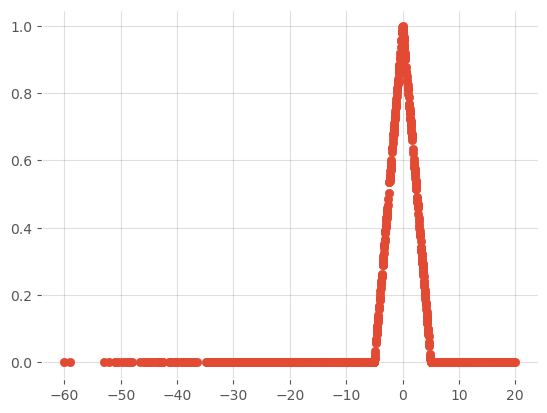

In [102]:
(
    plt
    .scatter(data3["attendance"], # x-axis
             kernel(data3["attendance"],
                    c = 0,
                    h = 5), # y-axis
            )
)

In [103]:
data3.head(2)

,index,id,attendance,treatment,grade,diff_to_threshold,threshold_binary,estimated_treatment,fitted_grades
0,0,1,11.69,0,87.75,11.69,1,6.661338e-16,84.421807
1,940,941,5.08,0,80.55,5.08,1,8.881784e-16,74.113440


In [104]:
model1_kernel =\
(
    smf
    .wls(formula = "treatment ~ diff_to_threshold + threshold_binary",
         data = data3,
         weights = kernel(data3["attendance"],
                          c = 0,
                          h = 3) # 3 days for LATE
        )
    .fit()
)

data3["estimated_treatment_kernel"] =\
(
    model1_kernel
    .fittedvalues
)

data3.columns

Index(['index', 'id', 'attendance', 'treatment', 'grade', 'diff_to_threshold',
       'threshold_binary', 'estimated_treatment', 'fitted_grades',
       'estimated_treatment_kernel'],
      dtype='object')

In [105]:
model2_kernel =\
(
    smf
    .wls(formula = "grade ~ diff_to_threshold + estimated_treatment_kernel",
         data = data3,
         weights = kernel(data3["diff_to_threshold"],
                          c = 0,
                          h = 3) # 3 days for LATE
        )
    .fit()
)

model2_kernel.summary()

/opt/homebrew/anaconda3/lib/python3.13/site-packages/statsmodels/regression/linear_model.py:806: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.273
Model:                            WLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     225.2
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           9.93e-84
Time:                        04:52:17   Log-Likelihood:                   -inf
No. Observations:                1200   AIC:                               inf
Df Residuals:                    1197   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     63.6801      0.387    164.552      0.000      62.921      64.439
diff_to_threshold              2.0157      0.286      7.060      0.000       1.456       2.576
estimated_treatment_kernel    12.3083      0.716     17.189      0.000      10.903      13.713
==============================================================================
Omnibus:                      273.314   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11332.558
Skew:                          -0.042   Prob(JB):                         0.00
Kurtosis:                      18.055   Cond. No.                         5.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
data3.columns

Index(['index', 'id', 'attendance', 'treatment', 'grade', 'diff_to_threshold',
       'threshold_binary', 'estimated_treatment', 'fitted_grades',
       'estimated_treatment_kernel'],
      dtype='object')

In [107]:
data3["fitted_grades_to_input"] =\
(
    model2_kernel
    .fittedvalues
)

effect_size_in_percent =\
(
    (model2_kernel.params["diff_to_threshold"] + model2_kernel.params["Intercept"])
    /                    # B2 of interest
    model2_kernel.params["Intercept"]
    - 1
) * 100

### <font color = red> What is your econometric assessment of the causal effects? </font>

In [108]:
(
    ggplot(data3,
           aes(x = "diff_to_threshold",
               y = "grade")
          )
    + geom_point(alpha = 0.30)
    + geom_line(aes(y = "fitted_grades_to_input"),
                color = "red")
    + labs(x = "Distance to Attendance Program Implementation",
           y = "Grade",
           title = "Causal Effects of Attendance Program Implementation",
           subtitle = f"Effect size: {np.round(effect_size_in_percent, 1)}%",
           caption = "Yes, something is NOT right here."
           )
)

    IMPORTANT NOTE: 

### <font color = purple> <center> Prior to submitting, ensure that you execute the following command to present your workspace.

### <font color = purple> <center> Before submission, ensure that your responses are entered into the designated cells provided for answering.

In [109]:
%whos

Variable                                      Type                        Data/Info
-----------------------------------------------------------------------------------
GGBunch                                       type                        <class 'lets_plot.plot.plot.GGBunch'>
HTML                                          type                        <class 'IPython.core.display.HTML'>
IPW                                           RegressionResultsWrapper    <statsmodels.regression.l<...>er object at 0x1681d9480>
LetsPlot                                      type                        <class 'lets_plot.LetsPlot'>
LogisticRegression                            type                        <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
NearestNeighbors                              ABCMeta                     <class 'sklearn.neighbors<...>rvised.NearestNeighbors'>
PSM                                           RegressionResultsWrapper    <statsmodels.regression.l<...>er object at 

### <font color = green> 💯 Thank you for putting effort into the analytics exercise problem set 😊